In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import holidays
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, precision_score, recall_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [5]:
df_pr = pd.read_csv("df_pr.csv")

Text(0.5, 1.0, 'Sum of Consumtion Vs. Year')

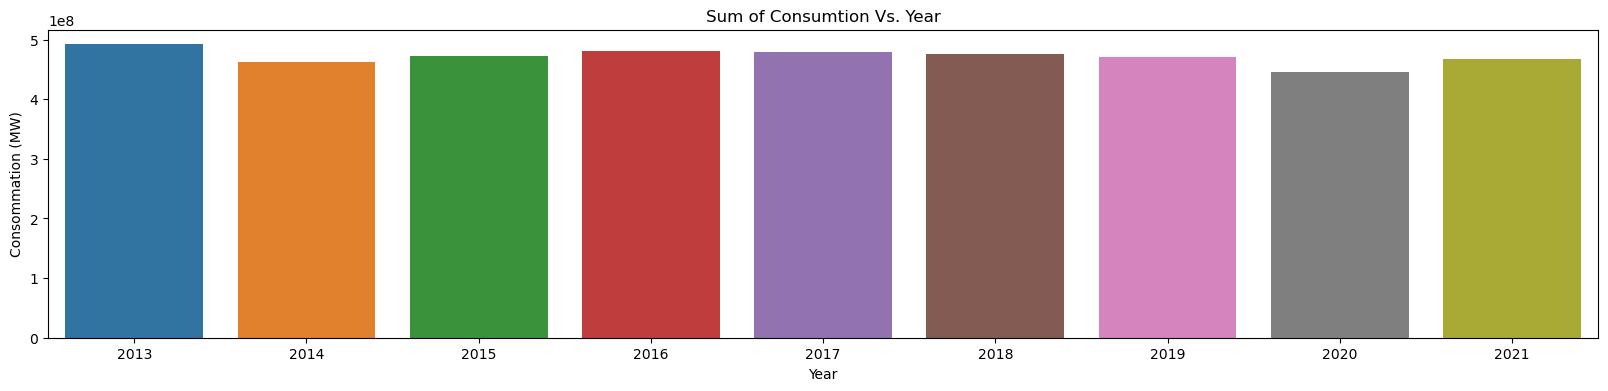

In [6]:
# Creating a plot of Sum of Consumtion Vs. Year
plt.figure(figsize = (20,4))
grouped_df = df_pr.groupby('Year')['Consommation (MW)'].sum().reset_index()

sns.barplot(x = 'Year', y = 'Consommation (MW)', data = grouped_df).set_title("Sum of Consumtion Vs. Year")

Text(0.5, 1.0, 'Sum of Consumtion Vs. Weekday')

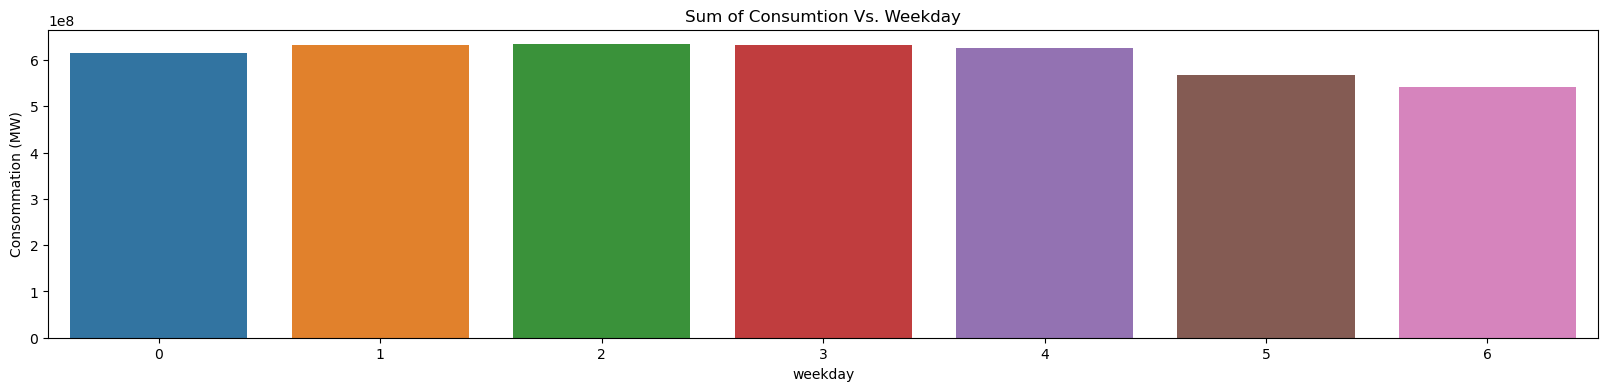

In [7]:
# Creating a plot of Sum of Consumtion Vs. Weekday
plt.figure(figsize = (20,4))
grouped_df = df_pr.groupby('weekday')['Consommation (MW)'].sum().reset_index()
sns.barplot(x = 'weekday', y = 'Consommation (MW)', data = grouped_df).set_title("Sum of Consumtion Vs. Weekday")

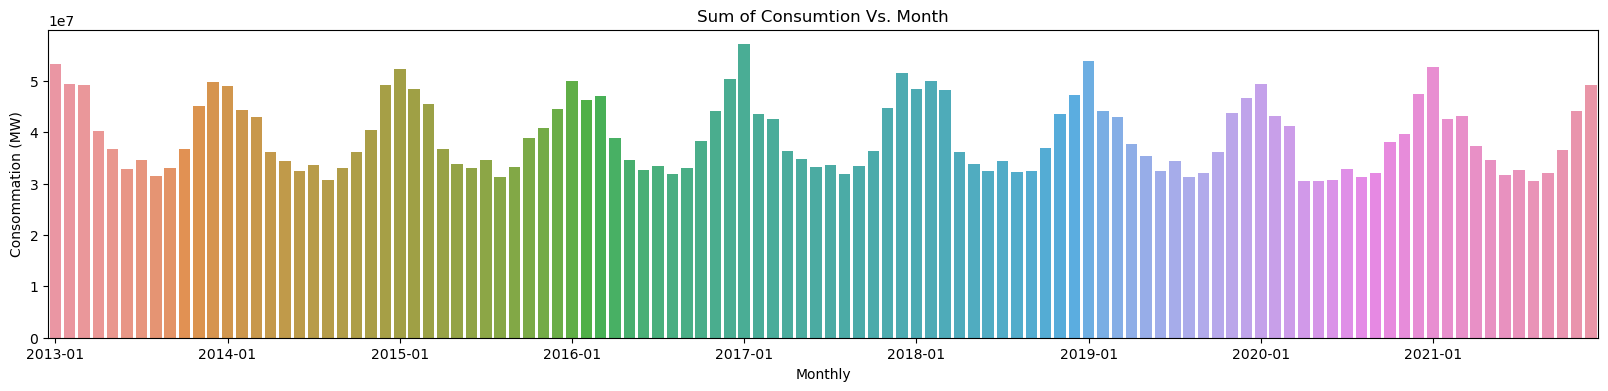

In [8]:
# Creating a plot of Sum of Consumtion Vs. Month
# Set the figure size
plt.figure(figsize=(20, 4))

# Group by 'Monthly' and calculate the sum of 'Consommation (MW)'
grouped_df = df_pr.groupby('Monthly')['Consommation (MW)'].sum().reset_index()

# Create the bar plot
sns.barplot(x='Monthly', y='Consommation (MW)', data=grouped_df)

# Set title
plt.title("Sum of Consumtion Vs. Month")

# Set x-axis tick labels for yearly markers
plt.xticks(grouped_df.index[::12], grouped_df['Monthly'].values[::12])

# Show plot
plt.show()

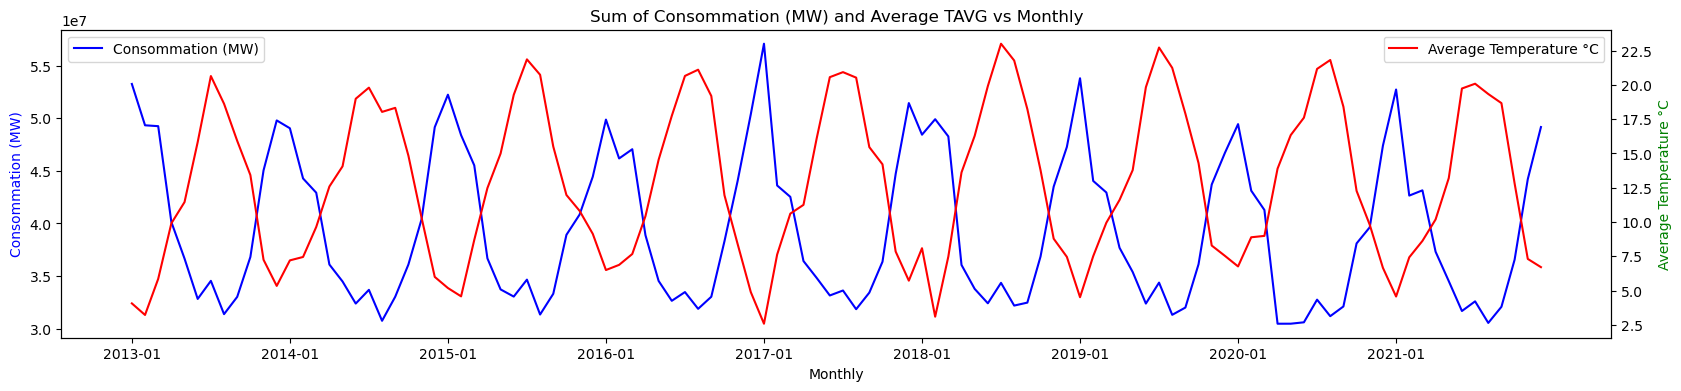

In [9]:
# Creating a plot of Sum of Consommation (MW) and Average TAVG vs Monthly

# Groupby the column needed
monthly_data = df_pr.groupby('Monthly').agg({'Consommation (MW)': 'sum', 'TAVG': 'mean'}).reset_index()

# Create the subplots
fig, ax1 = plt.subplots(figsize=(20, 4))

# Plot sum of 'Consommation (MW)'
ax1.plot(monthly_data['Monthly'], monthly_data['Consommation (MW)'], color='blue', label='Consommation (MW)')
ax1.set_xlabel('Monthly')
ax1.set_ylabel('Consommation (MW)', color='blue')

# Create a secondary y-axis for 'TAVG'
ax2 = ax1.twinx()
ax2.plot(monthly_data['Monthly'], monthly_data['TAVG'], color='red', label='Average Temperature °C')
ax2.set_ylabel('Average Temperature °C', color='green')

# Set x-axis tick labels for yearly markers
plt.xticks(monthly_data.index[::12], monthly_data['Monthly'].values[::12], rotation=45)

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title
plt.title('Sum of Consommation (MW) and Average TAVG vs Monthly')

# Show plot
plt.show()

Text(0.5, 1.0, 'Sum of Consumtion Vs. Month')

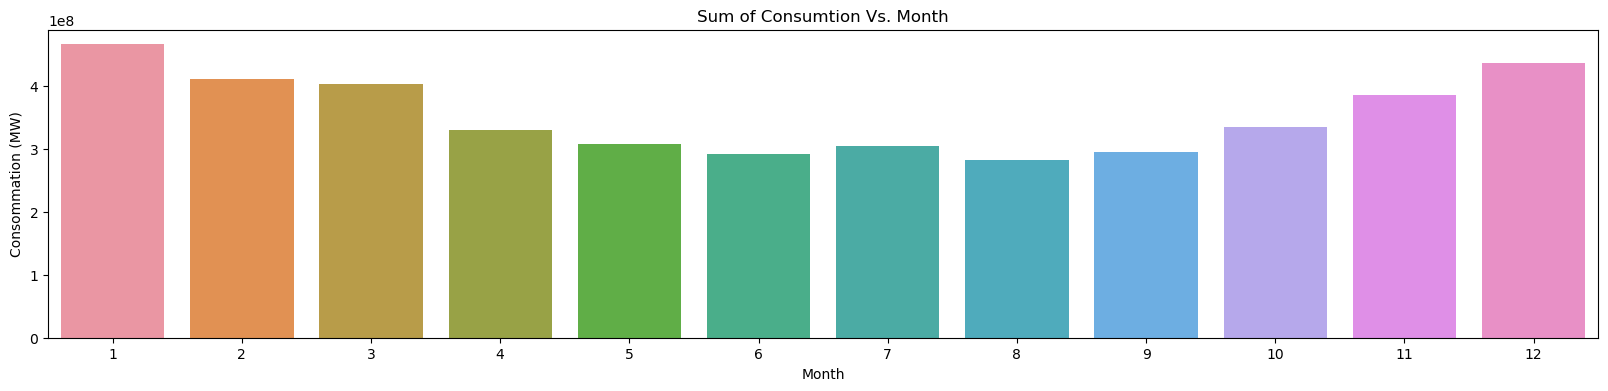

In [10]:
# Creating a plot of Sum of Consumtion Vs. Month
plt.figure(figsize = (20,4))
grouped_df = df_pr.groupby('Month')['Consommation (MW)'].sum().reset_index()
sns.barplot(x = 'Month', y = 'Consommation (MW)', data = grouped_df).set_title("Sum of Consumtion Vs. Month")

Text(0.5, 1.0, 'Sum of Consumtion Vs. Season')

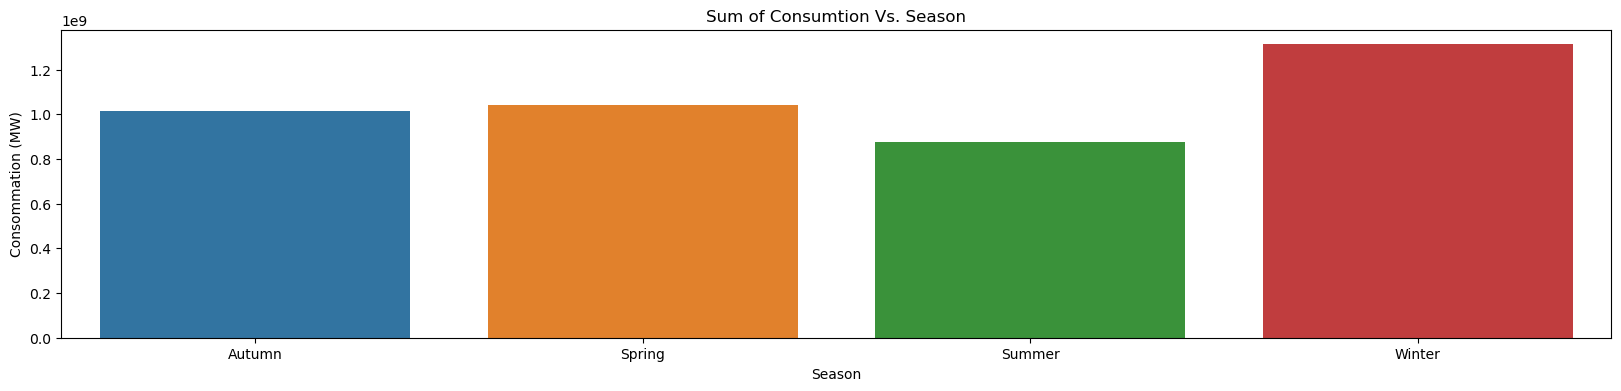

In [12]:
# Creating a plot of Sum of Consumtion Vs. Season
plt.figure(figsize = (20,4))
grouped_df = df_pr.groupby('Season')['Consommation (MW)'].sum().reset_index()
sns.barplot(x = 'Season', y = 'Consommation (MW)', data = grouped_df).set_title("Sum of Consumtion Vs. Season")

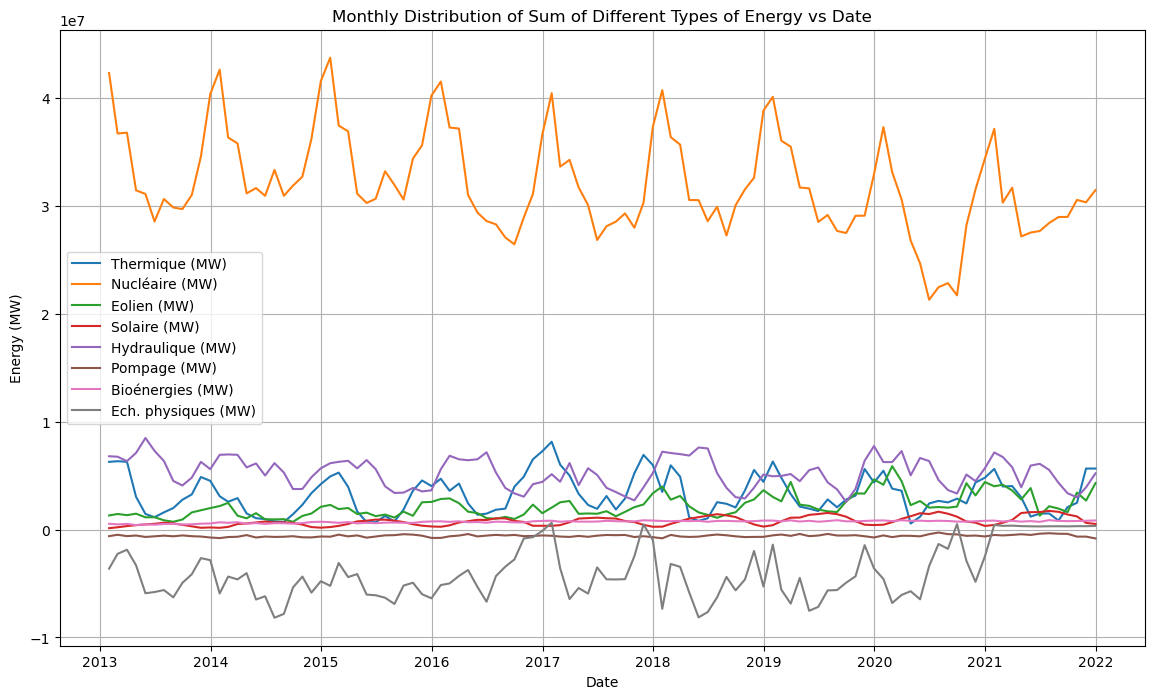

In [13]:
# Creating a plot of Monthly Distribution of Sum of Different Types of Energy vs Date

df_pr['Date'] = pd.to_datetime(df_pr['Date'])

# Set Date column as the inde
df_pr.set_index('Date', inplace=True)
df_monthly_sum = df_pr.resample('M').sum()

# Plot
plt.figure(figsize=(14, 8))
plt.plot(df_monthly_sum.index, df_monthly_sum['Thermique (MW)'], label='Thermique (MW)')
plt.plot(df_monthly_sum.index, df_monthly_sum['Nucléaire (MW)'], label='Nucléaire (MW)')
plt.plot(df_monthly_sum.index, df_monthly_sum['Eolien (MW)'], label='Eolien (MW)')
plt.plot(df_monthly_sum.index, df_monthly_sum['Solaire (MW)'], label='Solaire (MW)')
plt.plot(df_monthly_sum.index, df_monthly_sum['Hydraulique (MW)'], label='Hydraulique (MW)')
plt.plot(df_monthly_sum.index, df_monthly_sum['Pompage (MW)'], label='Pompage (MW)')
plt.plot(df_monthly_sum.index, df_monthly_sum['Bioénergies (MW)'], label='Bioénergies (MW)')
plt.plot(df_monthly_sum.index, df_monthly_sum['Ech. physiques (MW)'], label='Ech. physiques (MW)')

plt.xlabel('Date')
plt.ylabel('Energy (MW)')
plt.title('Monthly Distribution of Sum of Different Types of Energy vs Date')
plt.legend()
plt.grid(True)
plt.show()

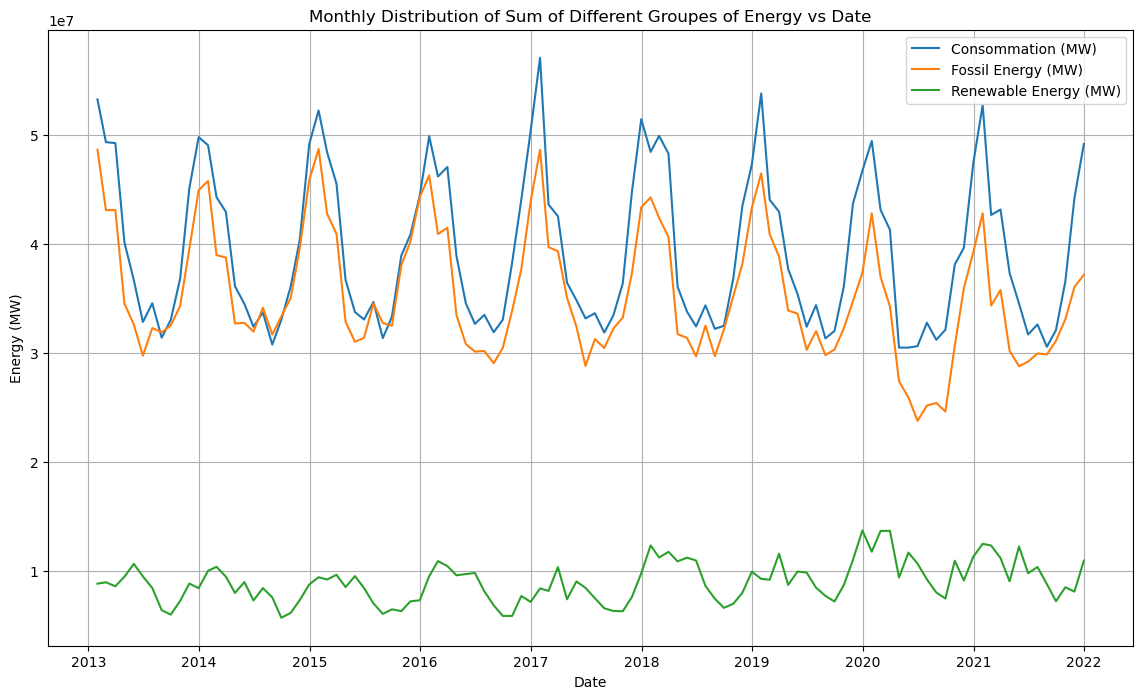

In [14]:
# Creating a plot of Monthly Distribution of Sum of Different Groupes of Energy vs Date
# Plot
plt.figure(figsize=(14, 8))
plt.plot(df_monthly_sum.index, df_monthly_sum['Consommation (MW)'], label='Consommation (MW)')
plt.plot(df_monthly_sum.index, df_monthly_sum['Fossil Energy (MW)'], label='Fossil Energy (MW)')
plt.plot(df_monthly_sum.index, df_monthly_sum['Renewable Energy (MW)'], label='Renewable Energy (MW)')

plt.xlabel('Date')
plt.ylabel('Energy (MW)')
plt.title('Monthly Distribution of Sum of Different Groupes of Energy vs Date')
plt.legend()
plt.grid(True)
plt.show()


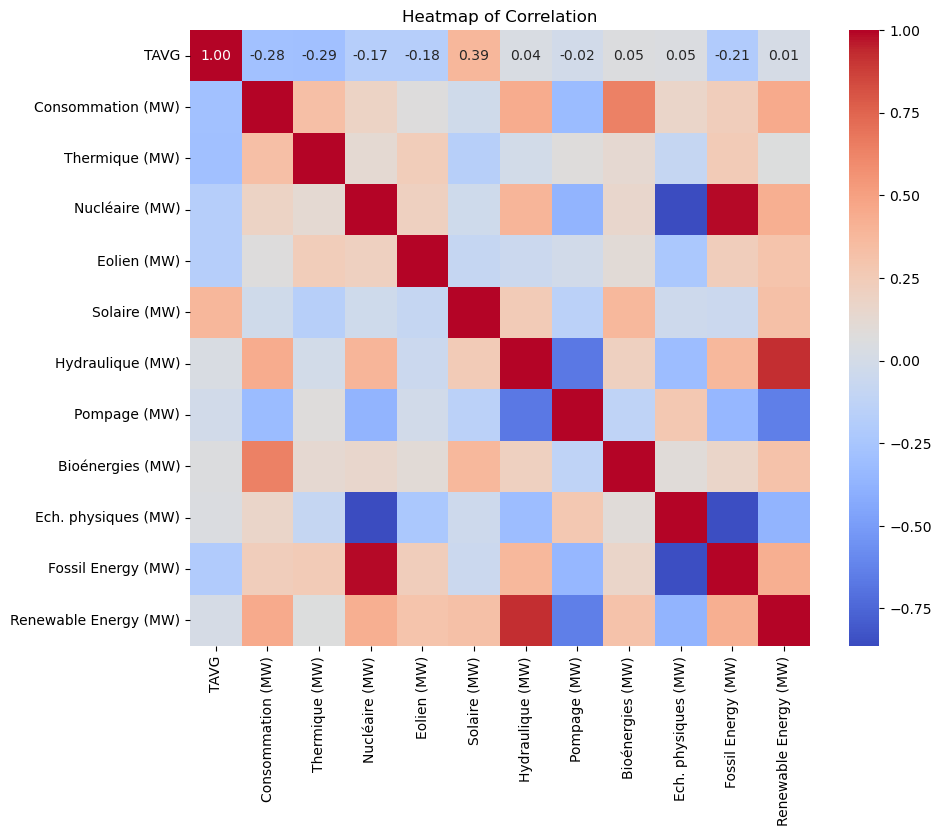

In [15]:
#Creating a Heatmap of Correlation
# Select the columns
selected_columns = ['TAVG','Consommation (MW)','Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 
                         'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)','Fossil Energy (MW)','Renewable Energy (MW)']

# Subset the DataFrame to include only the selected energy types
df_selected = df_pr[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Heatmap of Correlation')
plt.show()

C:\Users\czako\AppData\Local\Temp\ipykernel_11416\709052185.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(region_data, label=region, shade=True)
c:\Users\czako\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\czako\AppData\Local\Temp\ipykernel_11416\709052185.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(region_data, label=region, shade=True)
c:\Users\czako\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

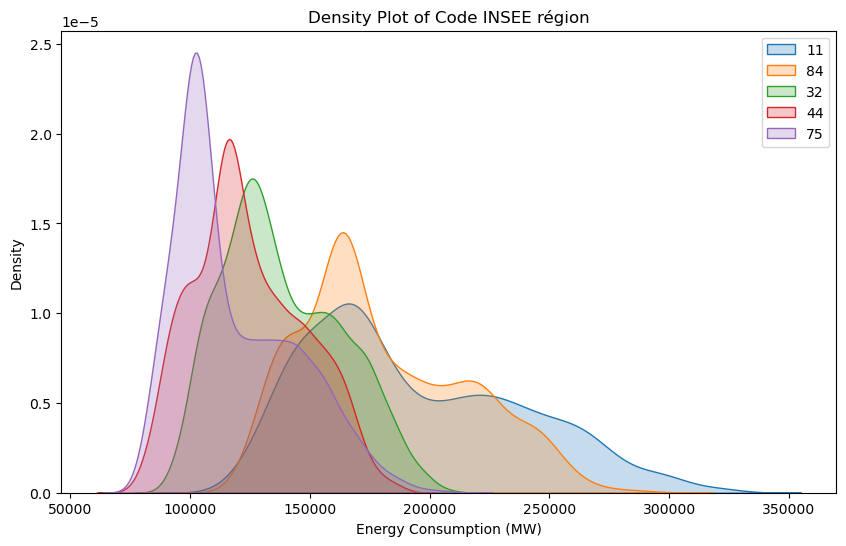

In [16]:
# Creating a Density Plot of Code INSEE région

# Groupby the columns
region_sum_consumption = df_pr.groupby('Code INSEE région')['Consommation (MW)'].sum()

# Select top 5 regions based on sum of energy consumption
top_5_regions = region_sum_consumption.nlargest(5).index

# Plot density plot for each top region
plt.figure(figsize=(10, 6))
for region in top_5_regions:
    region_data = df_pr[df_pr['Code INSEE région'] == region]['Consommation (MW)']
    sns.kdeplot(region_data, label=region, shade=True)
plt.title('Density Plot of Code INSEE région')
plt.xlabel('Energy Consumption (MW)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [17]:
# Searching the P value
statistic, p_value = shapiro(df_pr['Consommation (MW)'])

print("p-value:", p_value)

p-value: 0.0


c:\Users\czako\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [18]:
# Subset the DataFrame to include only the selected energy types
selected_columns = ['Consommation (MW)',  'TAVG',  'Month', 'Code INSEE région', 'Season', 'Monthly']

df_model = df_pr[selected_columns]

In [19]:
# Initialize LabelEncoder for df_model['Season']
le = LabelEncoder()
df_model['Season'] = le.fit_transform(df_model['Season'])

C:\Users\czako\AppData\Local\Temp\ipykernel_11416\628102044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Season'] = le.fit_transform(df_model['Season'])


In [20]:
# Checking the dataframe
df_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39444 entries, 2013-01-01 to 2021-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Consommation (MW)  39444 non-null  float64
 1   TAVG               39444 non-null  float64
 2   Month              39444 non-null  int64  
 3   Code INSEE région  39444 non-null  int64  
 4   Season             39444 non-null  int32  
 5   Monthly            39444 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.0+ MB


In [21]:

# Initialize LabelEncoder for df_model['Monthly']
encoder = LabelEncoder()

# Fit and transform the 'Monthly' column
df_model['Monthly'] = encoder.fit_transform(df_model['Monthly'])

C:\Users\czako\AppData\Local\Temp\ipykernel_11416\1505235897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Monthly'] = encoder.fit_transform(df_model['Monthly'])


In [22]:
# Cyclical encoding for Season
df_model['Season_sin'] = np.sin(2 * np.pi * df_model['Season'] / max(df_model['Season']))
df_model['Season_cos'] = np.cos(2 * np.pi * df_model['Season'] / max(df_model['Season']))

# Cyclical encoding for Month
df_model['Month_sin'] = np.sin(2 * np.pi * df_model['Month'] / max(df_model['Month']))
df_model['Month_cos'] = np.cos(2 * np.pi * df_model['Month'] / max(df_model['Month']))

# Drop the original columns
df_model.drop(columns=['Season', 'Month'], inplace=True)

C:\Users\czako\AppData\Local\Temp\ipykernel_11416\3020304688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Season_sin'] = np.sin(2 * np.pi * df_model['Season'] / max(df_model['Season']))
C:\Users\czako\AppData\Local\Temp\ipykernel_11416\3020304688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Season_cos'] = np.cos(2 * np.pi * df_model['Season'] / max(df_model['Season']))
C:\Users\czako\AppData\Local\Temp\ipykernel_11416\3020304688.py:6: SettingWithCopyWarning: 
A value is try

In [23]:
df_model.to_csv('df_model.csv')

In [24]:
# Splitting the data into training and testing sets:
train = df_model.drop(['Consommation (MW)'], axis=1)
test = df_model[['Consommation (MW)']]

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.20, random_state=42)

In [25]:
# Fit the LinearRegression model

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

# Predict on train set
train_predictions = linear_model.predict(X_train)

# Predict on test set
lr_y_pred = linear_model.predict(X_test)


In [27]:

# Calculate R², MSE, RMSE, and MAE for train set
train_r2 = r2_score(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)

# Calculate R², MSE, RMSE, and MAE for test set
test_r2 = r2_score(y_test, lr_y_pred)
test_mse = mean_squared_error(y_test, lr_y_pred)
test_rmse = mean_squared_error(y_test, lr_y_pred, squared=False)
test_mae = mean_absolute_error(y_test, lr_y_pred)

print("Train Set Metrics:")
print("R² Score:", train_r2)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("Mean Absolute Error (MAE):", train_mae)
print("\nTest Set Metrics:")
print("R² Score:", test_r2)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("Mean Absolute Error (MAE):", test_mae)

Train Set Metrics:
R² Score: 0.15255618432756923
Mean Squared Error (MSE): 2200516386.3443084
Root Mean Squared Error (RMSE): 46909.66197218126
Mean Absolute Error (MAE): 37716.99486387142

Test Set Metrics:
R² Score: 0.15219179654994086
Mean Squared Error (MSE): 2099032978.593901
Root Mean Squared Error (RMSE): 45815.2046660702
Mean Absolute Error (MAE): 37131.85686010109


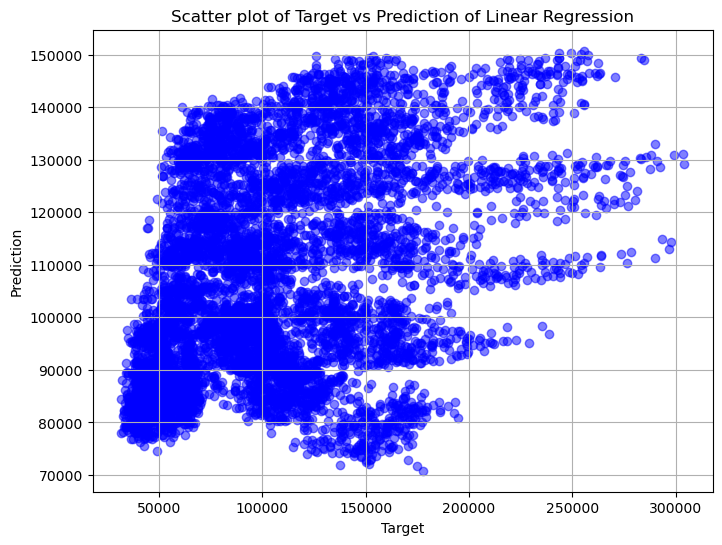

In [28]:
# Create Scatter plot of Target vs Prediction of Linear Regression model

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_y_pred, color='blue', alpha=0.5)
plt.title('Scatter plot of Target vs Prediction of Linear Regression')
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()


In [29]:
# Fit the DecisionTreeRegressor model

dt_model = DecisionTreeRegressor(max_depth = 6) #max depth 6 to avoid the overfitting
dt_model.fit(X_train, y_train)

# Predict on train set
train_predictions = dt_model.predict(X_train)

# Predict on test set
dtr_y_pred = dt_model.predict(X_test)


In [30]:
# Calculate R², MSE, RMSE, and MAE for train set
train_r2 = r2_score(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)

# Calculate R², MSE, RMSE, and MAE for test set
test_r2 = r2_score(y_test, dtr_y_pred)
test_mse = mean_squared_error(y_test, dtr_y_pred)
test_rmse = mean_squared_error(y_test, dtr_y_pred, squared=False)
test_mae = mean_absolute_error(y_test, dtr_y_pred)

print("Train Set Metrics:")
print("R² Score:", train_r2)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("Mean Absolute Error (MAE):", train_mae)
print("\nTest Set Metrics:")
print("R² Score:", test_r2)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("Mean Absolute Error (MAE):", test_mae)

Train Set Metrics:
R² Score: 0.9318179665385043
Mean Squared Error (MSE): 177044990.01771182
Root Mean Squared Error (RMSE): 13305.8254166253
Mean Absolute Error (MAE): 10012.52237326516

Test Set Metrics:
R² Score: 0.9240555738682634
Mean Squared Error (MSE): 188025846.34378764
Root Mean Squared Error (RMSE): 13712.251687589009
Mean Absolute Error (MAE): 10238.048689056983


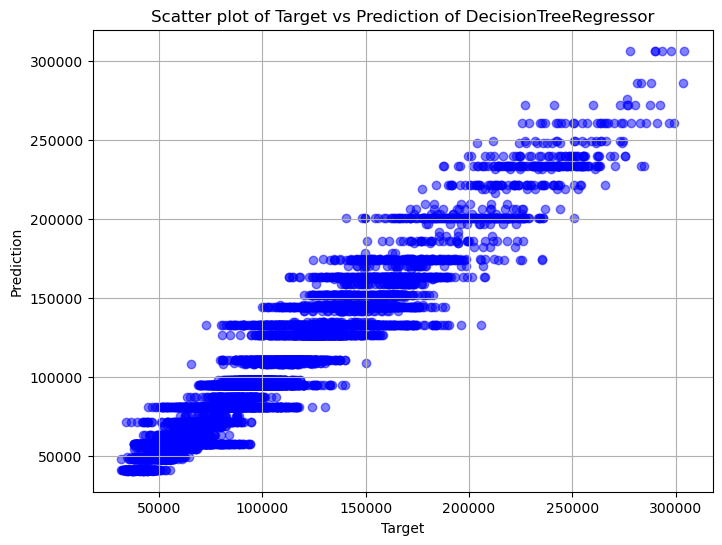

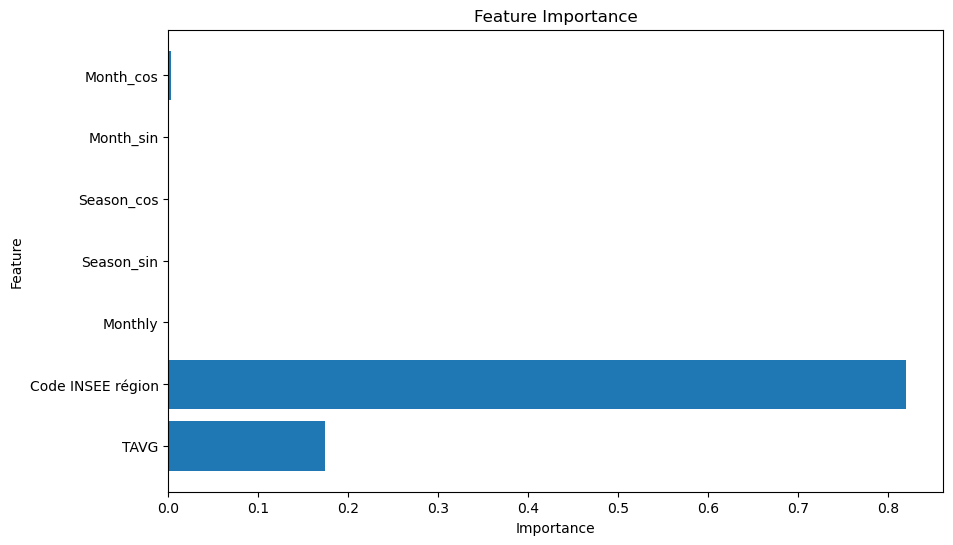

In [31]:
# Create Scatter plot of Target vs Prediction of DecisionTreeRegressor model

plt.figure(figsize=(8, 6))
plt.scatter(y_test, dtr_y_pred, color='blue', alpha=0.5)
plt.title('Scatter plot of Target vs Prediction of DecisionTreeRegressor')
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, dt_model.feature_importances_)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()